# Linear Regression

## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [ ]:
df = pd.read_csv("/content/Advertising.csv")

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.sales.mean()

14.0225

The basic assumptions for the linear regression model are the following:

1) A linear relationship exists between the independent variable (X) and dependent variable (y)

2) Little or no multicollinearity between the different features

3) Residuals should be normally distributed (multi-variate normality)

4) Little or no autocorrelation among residues

5) Homoscedasticity of the errors. error should be random to all your predicted values

source : https://towardsdatascience.com/linear-regression-and-its-assumptions-ef6e8db4904d

In [ ]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [ ]:
df[['total_spend','sales']].head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


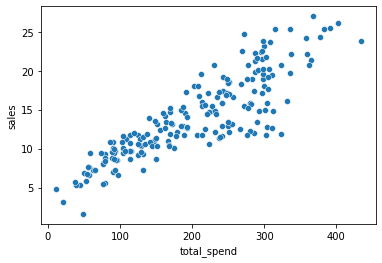

In [ ]:
sns.scatterplot(x='total_spend',y='sales',data=df)

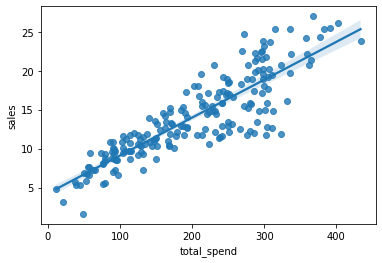

In [ ]:
sns.regplot(x='total_spend',y='sales',data=df)

Let's go ahead and start solving: $$y=wx+c$$

In [ ]:
X = df['total_spend']
y = df['sales']

## Train Model

In [ ]:
np.polyfit(X,y,1)

array([0.04868788, 4.24302822])

implement the formula: $$y=mx+b$$

In [ ]:
y =  0.04868788*X + 4.24302822

## Result

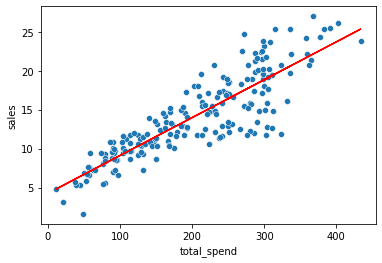

In [ ]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(X,y,color='red')

# Linear Regression with Scikit Learn

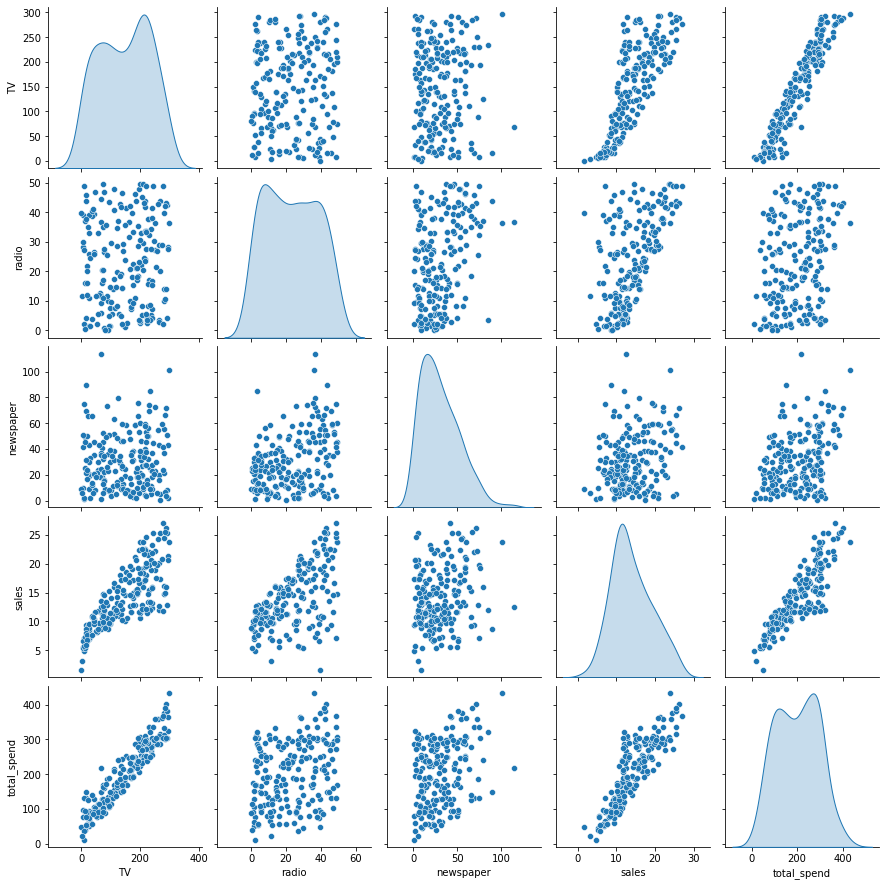

In [ ]:
sns.pairplot(df,diag_kind='kde')

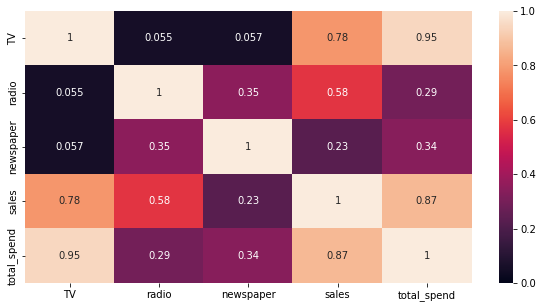

In [ ]:
corr = df.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

In [ ]:
X = df.drop(['sales','total_spend'],axis=1)
y = df['sales']

## VIF 
multicollinearity test

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [ ]:
X = df.iloc[:,:-2]
calc_vif(X)

,variables,VIF
0,TV,2.486772
1,radio,3.285462
2,newspaper,3.055245


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

<img src='https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module6-RandomError/Normal%20Distribution%20deviations.png'>


Z-score formula :     

$$
\begin{equation}Z = \frac{x - \bar{x}}{s}\end{equation}
$$

In [ ]:
print(np.round_(X_train_scaled))

[[-1.  1.  4.]
 [-0. -1. -0.]
 [-1. -1.  0.]
 [-2. -0.  1.]
 [-1.  0. -0.]
 [-1. -0. -1.]
 [-2.  0. -1.]
 [ 1. -1.  1.]
 [ 0. -1.  1.]
 [ 1.  2.  1.]
 [-1.  1.  1.]
 [ 1. -1. -0.]
 [ 2. -1. -0.]
 [-0. -1. -1.]
 [ 1. -1. -0.]
 [-2. -1. -1.]
 [ 1.  1. -1.]
 [-1.  1. -1.]
 [ 1. -0. -1.]
 [ 0. -0.  0.]
 [ 1. -0.  2.]
 [ 2.  1.  2.]
 [-1. -2. -1.]
 [ 0.  2.  1.]
 [ 1. -1.  1.]
 [ 1.  1.  2.]
 [ 0. -0. -1.]
 [-1.  2.  0.]
 [-0.  1.  2.]
 [-0.  1. -0.]
 [ 1. -1.  2.]
 [-1. -1. -1.]
 [ 2. -1. -1.]
 [-1. -2. -1.]
 [-1. -1. -1.]
 [ 1.  1.  0.]
 [-1.  1.  1.]
 [ 1.  2.  1.]
 [-2.  0.  0.]
 [ 1. -1. -1.]
 [ 2. -1.  0.]
 [-0. -0.  0.]
 [-1. -1. -0.]
 [ 1.  1. -1.]
 [ 0.  1. -1.]
 [ 1. -0. -0.]
 [-2. -1.  0.]
 [ 1. -1. -1.]
 [ 1.  1. -1.]
 [ 0. -1. -1.]
 [-1. -1.  0.]
 [ 1. -1. -0.]
 [-1.  2. -1.]
 [-1. -0.  0.]
 [ 1. -1. -1.]
 [-0.  0.  1.]
 [-1. -1.  0.]
 [-0.  0. -1.]
 [-0. -0. -1.]
 [-1. -0.  0.]
 [-0. -1. -1.]
 [ 2.  1.  1.]
 [-0. -1. -0.]
 [-1.  1.  2.]
 [ 1. -0. -0.]
 [ 1.  0. -1.]
 [-2. -2. 

## No Autocorrelation Test

Linear regression model assumes that error terms are independent. This means that the error term of one observation is not influenced by the error term of another observation. In case it is not so, it is termed as autocorrelation.

It is generally observed in time series data. Time series data consists of observations for which data is collected at discrete points in time. Usually, observations at adjacent time intervals will have correlated errors.

In [ ]:
import statsmodels.api as sm

# Define the modell
feature = sm.add_constant(X)
mod = sm.OLS(y, feature)

# Fit the model
result = mod.fit()

# Print the model summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           1.58e-96
Time:                        16:01:18   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<img src='https://www.researchgate.net/profile/Sc-Thushara/post/How-to-choose-significance-level-for-Durbin-Watson-Statistics/attachment/5a52bbd6b53d2f0bba499b3b/AS%3A580324195553280%401515371478750/image/DW.jpg'>

## ACF Plot (Autocorrelation Test)

In [ ]:
df.sample(200)

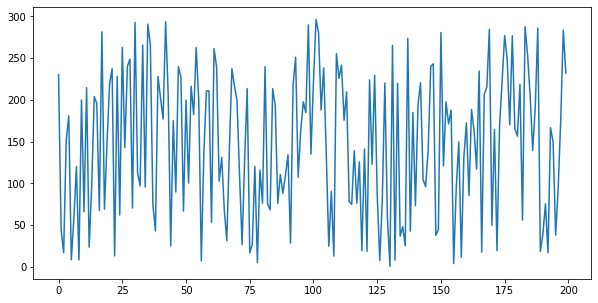

<Figure size 720x360 with 0 Axes>

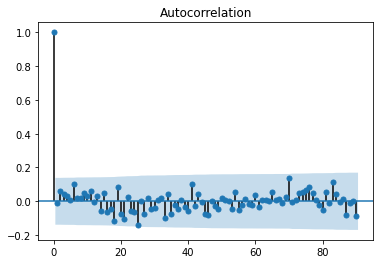

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10,5))
plt.plot(X.TV)

plt.figure(figsize=(10,5))
plot_acf(X.TV, lags=90)
plt.show()


What you can see here are bars and a horizontal cone. This cone pictures the confidence level (by default set to 95%). In other words, if the point is outside the cone (on white) you may say that with 95% probability is has a certain impact on values. If the bar is inside the cone (on blue) you may ignore this particular lag as most likely it is not relevant

https://www.alpharithms.com/autocorrelation-time-series-python-432909/

## Model Definition

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

## Train Model

In [ ]:
model.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [ ]:
y_pred_test

array([15.68292592, 19.58907536, 11.33442246, 16.97160642,  9.00229777,
        6.8258424 , 20.28370847, 17.25050474,  9.62422935, 19.21261943,
       12.28165709, 13.79124205, 13.63171832, 21.3166205 , 18.4260183 ,
        9.83360121, 15.48826256,  7.50717778,  7.37608168, 20.40569824,
        7.61221263, 18.21702553, 24.75227276, 22.87105326,  7.79566192,
       12.55620637, 21.47155589,  7.89397664, 12.3119109 , 12.41822104,
       10.6650977 , 19.23984433,  9.92216352,  6.53329195, 17.27904496,
        7.60035587,  9.1023379 ,  8.10416927, 10.45284718, 10.49584758])

## Evaluation Model

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error, however MAE won't punish large error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world (the issue with MSE : different units than y, it reports units of y squared.)
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.
- **R2** R-squared evaluates the scatter of the data points around the fitted regression line, determine how well the model fits the data.

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))

print('MSE train = ', mean_squared_error(y_train, y_pred_train))
print('MSE test = ', mean_squared_error(y_test, y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))

MAE train =  1.2907218211025215
MAE test =  1.1244750006255653
MSE train =  2.968918089281973
MSE test =  2.0634188501214767
RMSE train =  1.723054871233639
RMSE test =  1.4364605285636904
r2score train =  0.8876537266968315
r2score test =  0.9303140201228004


In [ ]:
df['sales'].mean()

14.0225

## Anscombe's Quartet

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/850px-Anscombe%27s_quartet_3.svg.png">

## Residual PLot (Homoscedasticity of the errors)

In [ ]:
df_x = pd.DataFrame(data=X_test_scaled,columns=X.columns)

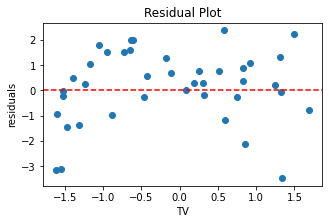

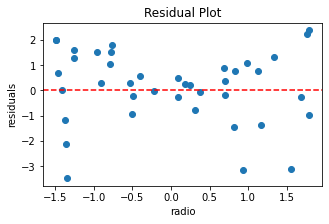

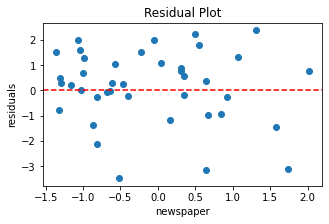

In [ ]:
for col in df_x.columns:
  plt.figure(figsize=(5,3))
  plt.scatter(x=df_x[col],y=y_test-y_pred_test)
  plt.title('Residual Plot')
  plt.xlabel(col)
  plt.ylabel('residuals')
  plt.axhline(y=0, color='r', linestyle='--')
  plt.show()

In [ ]:
test_res = y_test - y_pred_test

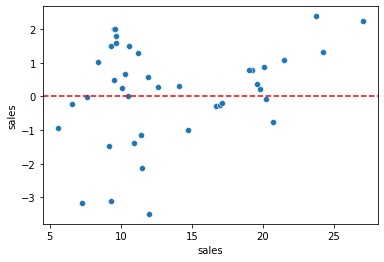

In [ ]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

It's should look random and no clear pattern in order to understand the dataset is valid for linear regression model

## Multivariate Normality Test

The residuals should be normally distributed. This can be easily checked by plotting QQ plot. We will use statsmodels, qqplot for plotting it. We first import the qqplot attribute and then feed it with residue values. 

<Figure size 360x216 with 0 Axes>

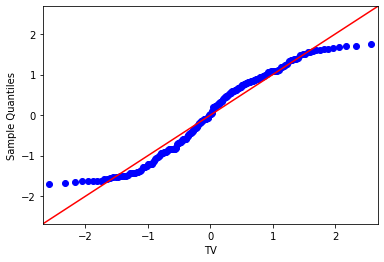

<Figure size 360x216 with 0 Axes>

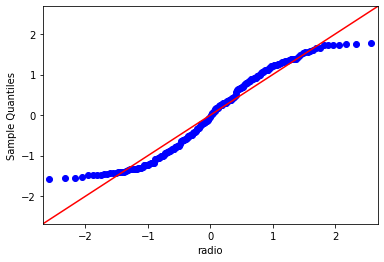

<Figure size 360x216 with 0 Axes>

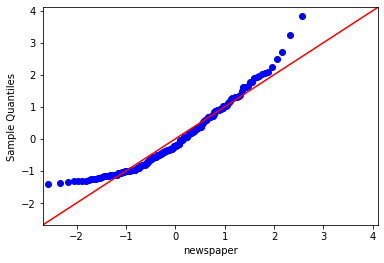

In [ ]:
from statsmodels.graphics.gofplots import qqplot
for col in X.columns:
  plt.figure(figsize=(5,3))
  qqplot(X[col],line='45',fit='True')
  plt.xlabel(col)
  plt.show()

Ideally, it should have been a straight line. This pattern shows that there is something seriously wrong with our model. We can not rely on this regression model. Let’s check if other assumption holds true or not.

## Coefficients

experiment build new model and fit it without scaling data

In [ ]:
model_unscaled = LinearRegression()

In [ ]:
model_unscaled.fit(X,y)

In [ ]:
model_unscaled.coef_

model fit with scaling data

In [ ]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

In [ ]:
X.head()

In [ ]:
print(df.sales[df.sales == y.max()].index.tolist())

In [ ]:
df.iloc[175]

## Model Inference

In [ ]:
new_data = [300,58,5]
new_data_scaled = scaler.transform([new_data])
pred_res = model.predict(new_data_scaled)
print('model predict is : ',pred_res)

# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_converter = PolynomialFeatures(degree=2)

In [ ]:
X_train

In [ ]:
poly_features = polynomial_converter.fit_transform(X_train)

In [ ]:
poly_feature_test = polynomial_converter.transform(X_test)

In [ ]:
poly_features.shape

In [ ]:
X_train.shape

In [ ]:
X_train.iloc[0]

In [ ]:
poly_features[0]

In [ ]:
67.8**2

In [ ]:
67.8*36.6

In [ ]:
2.48148*10**3

In [ ]:
67.8*114

In [ ]:
36.6**2

In [ ]:
36.6*114

In [ ]:
114**2

experiment using interaction_only=True and include_bias=False

In [ ]:
polynomial_converter2 = PolynomialFeatures(degree=2,interaction_only=True, include_bias=False)
poly_features2 = polynomial_converter2.fit_transform(X_train)
poly_feature_test2 = polynomial_converter2.transform(X_test)

In [ ]:
poly_features2[0]

## Model Definition & Train Model

fit & predict with default model

In [ ]:
poly_model = LinearRegression()
poly_model.fit(poly_features,y_train)

In [ ]:
poly_predict_train = poly_model.predict(poly_features)
poly_predict_test = poly_model.predict(poly_feature_test)

fit & predict with interaction_only=True and include_bias=False

In [ ]:
poly_model2 = LinearRegression()
poly_model2.fit(poly_features2,y_train)
poly_predict_train2 = poly_model2.predict(poly_features2)
poly_predict_test2 = poly_model2.predict(poly_feature_test2)

## Evaluation Model

matrics with polynomial default model result

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, poly_predict_train))
print('MAE test = ', mean_absolute_error(y_test, poly_predict_test))

print('MSE train = ', mean_squared_error(y_train, poly_predict_train))
print('MSE test = ', mean_squared_error(y_test, poly_predict_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, poly_predict_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, poly_predict_test)))

print('r2score train = ', r2_score(y_train, poly_predict_train))
print('r2score test = ', r2_score(y_test, poly_predict_test))

matrics with experiment model

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, poly_predict_train2))
print('MAE test = ', mean_absolute_error(y_test, poly_predict_test2))

print('MSE train = ', mean_squared_error(y_train, poly_predict_train2))
print('MSE test = ', mean_squared_error(y_test, poly_predict_test2))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, poly_predict_train2)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, poly_predict_test2)))

print('r2score train = ', r2_score(y_train, poly_predict_train2))
print('r2score test = ', r2_score(y_test, poly_predict_test2))

matrics with linear regression

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))

print('MSE train = ', mean_squared_error(y_train, y_pred_train))
print('MSE test = ', mean_squared_error(y_test, y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))

In [ ]:
compare_matrics = pd.DataFrame({'Data': ['Train', 'Test','Difference']
                        ,'MAE Polynomial': [mean_absolute_error(y_train, poly_predict_train), mean_absolute_error(y_test, poly_predict_test),mean_absolute_error(y_train, poly_predict_train) - mean_absolute_error(y_test, poly_predict_test)]
                        ,'RMSE Polynomial': [np.sqrt(mean_squared_error(y_train, poly_predict_train)), np.sqrt(mean_squared_error(y_test, poly_predict_test)),np.sqrt(mean_squared_error(y_train, poly_predict_train)) - np.sqrt(mean_squared_error(y_test, poly_predict_test))]
                        ,'r2score Polynomial':[r2_score(y_train, poly_predict_train),r2_score(y_test, poly_predict_test),r2_score(y_train, poly_predict_train) - r2_score(y_test, poly_predict_test)]
                        ,'MAE Modify Polynomial': [mean_absolute_error(y_train, poly_predict_train2), mean_absolute_error(y_test, poly_predict_test2),mean_absolute_error(y_train, poly_predict_train2) - mean_absolute_error(y_test, poly_predict_test2)]
                        ,'RMSE Modify Polynomial': [np.sqrt(mean_squared_error(y_train, poly_predict_train2)), np.sqrt(mean_squared_error(y_test, poly_predict_test2)),np.sqrt(mean_squared_error(y_train, poly_predict_train2)) - np.sqrt(mean_squared_error(y_test, poly_predict_test2))]
                        ,'r2score Modify Polynomial':[r2_score(y_train, poly_predict_train2),r2_score(y_test, poly_predict_test2),r2_score(y_train, poly_predict_train2) - r2_score(y_test, poly_predict_test2)]
                        ,'MAE Linear Reg': [mean_absolute_error(y_train, y_pred_train), mean_absolute_error(y_test, y_pred_test),mean_absolute_error(y_train, y_pred_train) - mean_absolute_error(y_test, y_pred_test)]
                        ,'RMSE Linear Reg': [np.sqrt(mean_squared_error(y_train, y_pred_train)), np.sqrt(mean_squared_error(y_test, y_pred_test)),np.sqrt(mean_squared_error(y_train, y_pred_train)) - np.sqrt(mean_squared_error(y_test, y_pred_test))]
                        ,'r2score Linear Reg':[r2_score(y_train, y_pred_train),r2_score(y_test, y_pred_test),r2_score(y_train, y_pred_train) - r2_score(y_test, y_pred_test)]
                          })  

In [ ]:
compare_matrics.T

# Ridge Regression (L2)

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=5)

In [ ]:
ridge_model.fit(X_train_scaled,y_train)

In [ ]:
ridge_pred_train = ridge_model.predict(X_train_scaled)
ridge_pred_test = ridge_model.predict(X_test_scaled)

In [ ]:
model.coef_

In [ ]:
ridge_model.coef_

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, ridge_pred_train))
print('MAE test = ', mean_absolute_error(y_test, ridge_pred_test))

print('MSE train = ', mean_squared_error(y_train, ridge_pred_train))
print('MSE test = ', mean_squared_error(y_test, ridge_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, ridge_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, ridge_pred_test)))

print('r2score train = ', r2_score(y_train, ridge_pred_train))
print('r2score test = ', r2_score(y_test, ridge_pred_test))

# Lasso Regerssion (L1)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model = Lasso()

In [ ]:
lasso_model.fit(X_train_scaled,y_train)

In [ ]:
lasso_pred_train = lasso_model.predict(X_train_scaled)
lasso_pred_test = lasso_model.predict(X_test_scaled)

In [ ]:
model.coef_

In [ ]:
lasso_model.coef_

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, lasso_pred_train))
print('MAE test = ', mean_absolute_error(y_test, lasso_pred_test))

print('MSE train = ', mean_squared_error(y_train, lasso_pred_train))
print('MSE test = ', mean_squared_error(y_test, lasso_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, lasso_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, lasso_pred_test)))

print('r2score train = ', r2_score(y_train, lasso_pred_train))
print('r2score test = ', r2_score(y_test, lasso_pred_test))

In [ ]:
lasso_model.coef_

# Elastic Net (L3)

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic_model = ElasticNet()

In [ ]:
elastic_model.fit(X_train_scaled,y_train)

In [ ]:
elastic_pred_train = elastic_model.predict(X_train_scaled)
elastic_pred_test = elastic_model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, elastic_pred_train))
print('MAE test = ', mean_absolute_error(y_test, elastic_pred_test))

print('MSE train = ', mean_squared_error(y_train, elastic_pred_train))
print('MSE test = ', mean_squared_error(y_test, elastic_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, elastic_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, elastic_pred_test)))

print('r2score train = ', r2_score(y_train, elastic_pred_train))
print('r2score test = ', r2_score(y_test, elastic_pred_test))

In [ ]:
model.coef_

In [ ]:
elastic_model.coef_

# Logistic Regression

In [ ]:
df = pd.read_csv('/content/hearing_test.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
sns.countplot(data=df,x='test_result')

In [ ]:
sns.boxplot(x='test_result',y='age',data=df)

In [ ]:
sns.boxplot(x='test_result',y='physical_score',data=df)

In [ ]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result')

In [ ]:
sns.pairplot(df,hue='test_result')

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
X = df.drop('test_result',axis=1)
y = df['test_result']

## Train Test Split & Scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Model Definition

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(scaled_X_train,y_train)

## Model Evaluation

In [ ]:
pred_prob = log_model.predict_proba(scaled_X_train)

In [ ]:
pred_prob

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

In [ ]:
y_pred_train = log_model.predict(scaled_X_train)
y_pred_test = log_model.predict(scaled_X_test)

In [ ]:
y_pred_train

In [ ]:
print('accuracy score train : ',accuracy_score(y_train,y_pred_train))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test))

In [ ]:
cm = confusion_matrix(y_test, y_pred_test, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_test))

In [ ]:
print(classification_report(y_train,y_pred_train))

# Multiclass LogReg

In [ ]:
df = pd.read_csv('/content/iris.csv')

In [ ]:
df.head()

In [ ]:
sns.scatterplot(x='petal_length',y='petal_width',data=df,hue='species')

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
X = df.drop('species',axis=1)
y = df['species']

## Model Definition

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg_model = LogisticRegression()

## Train Test Split & Scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
scaler = RobustScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
logreg_model.fit(X_train,y_train)

In [ ]:
logreg_pred_train = logreg_model.predict(X_train)
logreg_pred_test = logreg_model.predict(X_test)

In [ ]:
logreg_pred_test

## Evaluation Model

In [ ]:
print('accuracy score train : ',accuracy_score(y_train,logreg_pred_train))
print('accuracy score test : ',accuracy_score(y_test,logreg_pred_test))

In [ ]:
cm = confusion_matrix(y_test, logreg_pred_test, labels=logreg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg_model.classes_)

disp.plot()
plt.show()

In [ ]:
cm = confusion_matrix(y_train, logreg_pred_train, labels=logreg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg_model.classes_)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_train,logreg_pred_train))

In [ ]:
print(classification_report(y_test,logreg_pred_test))